In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Train a simple TensorFlow model

This notebook demonstrates the process of training a deep learning network to model patterns in underlying data. Here, we're going to train a network to model data generated by a [periodic square-wave waveform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html). This will result in a model that can take a value, `x`, and predict its square wave, `y`.

## Configure Defaults and Setup Environment

In [ ]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Import Dependencies

In [ ]:
# TensorFlow is an open source machine learning library
import tensorflow as tf
# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

## Dataset

### 1. Generate Data

The code in the following cell will generate a set of random `x` values, calculate their square wave, and display them.

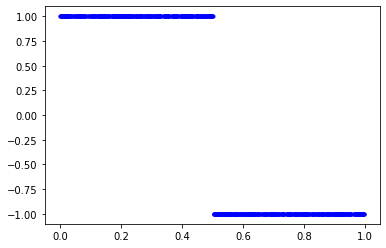

In [ ]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers
x_values = np.random.rand(SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

y_values = signal.square(2 * np.pi *x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

### 2. Add Noise

We add some noise to our data to approximate messy, real world data. We'll add some random noise to each value, then display them again:

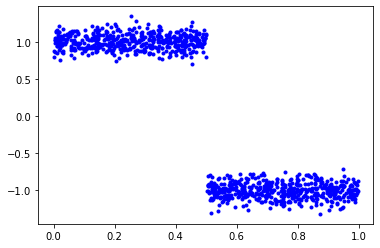

In [ ]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

### 3. Split the Data
We now have a noisy dataset that approximates real world data. We'll be using this to train our model.

To evaluate the accuracy of the training model, we'll need to compare its predictions to real data and check how well they match up. This evaluation happens during training by considering the validation set and after training by testing set. It's important in both sets that data was not already used to train the model.

The data can be split as follows:
  1. Training: 60%
  2. Validation: 20%
  3. Testing: 20% 


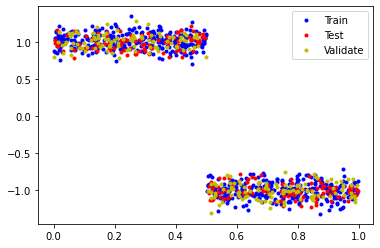

In [ ]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


## Training

### 1. Design the Model
We're going to build a simple neural network model that will take an input value (in this case, `x`) and use it to predict a numeric output value (the square wave of `x`). This type of problem is called a _regression_. It will use _layers_ of _neurons_ to attempt to learn any patterns underlying the training data, so it can make predictions.

To begin with, we'll define two layers. The first layer takes a single input (our `x` value) and runs it through 8 neurons. Based on this input, each neuron will become _activated_ to a certain degree based on its internal state (its _weight_ and _bias_ values). A neuron's degree of activation is expressed as a number.

In [ ]:
# We'll use Keras to create a simple model architecture
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(keras.layers.Dense(1))

model_1.summary()

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### 2. Train the Model
We now use our data to _train_ the model. Training runs this process on the full dataset multiple times, and each full run-through is known as an _epoch_. The number of epochs to run during training is a parameter we can set.



In [ ]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=300, batch_size=64,
                        validation_data=(x_validate, y_validate))

Epoch 1/300
10/10 [==============================] - 1s 55ms/step - loss: 0.9279 - mae: 0.9492 - val_loss: 0.8944 - val_mae: 0.9327
Epoch 2/300
10/10 [==============================] - 0s 8ms/step - loss: 0.9117 - mae: 0.9404 - val_loss: 0.8834 - val_mae: 0.9267
Epoch 3/300
10/10 [==============================] - 0s 9ms/step - loss: 0.8893 - mae: 0.9288 - val_loss: 0.8719 - val_mae: 0.9202
Epoch 4/300
10/10 [==============================] - 0s 6ms/step - loss: 0.9022 - mae: 0.9353 - val_loss: 0.8604 - val_mae: 0.9135
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: 0.8623 - mae: 0.9130 - val_loss: 0.8485 - val_mae: 0.9062
Epoch 6/300
10/10 [==============================] - 0s 6ms/step - loss: 0.8684 - mae: 0.9163 - val_loss: 0.8368 - val_mae: 0.8995
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: 0.8643 - mae: 0.9141 - val_loss: 0.8248 - val_mae: 0.8926
Epoch 8/300
10/10 [==============================] - 0s 7ms/step - loss: 0.8492 - 

### 3. Plot Metrics

**1. Mean Squared Error Loss (Erreur quadratique moyenne)**

During training, the model's performance is constantly being measured against both our training data and the validation data.

MSE Loss: 
$MSE=\frac{1}{N}\sum_{i=1}^N (Y_i-\hat{Y}_i)^2$ \\
where $Y_i$: real data, $\hat{Y}_i$: predicted data


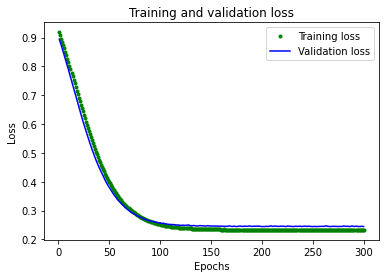

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The graph shows the _mean squared error_ for each epoch. As we can see, the loss rapidly decreases over the first 50 epochs, before getting the stable point. We need to stop training when either the model is no longer improving, or when the _training loss_ is less than the _validation loss_, which would mean that the model has learned to predict the training data so well that it can no longer generalize to new data.

To make the flatter part of the graph more readable, let's skip the first 100 epochs:

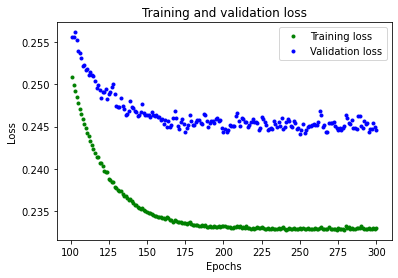

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the plot, we can see that loss continues to reduce until around 200 epochs, at which point it is mostly stable. This means that there's no need to train our network beyond 200 epochs.

**2. Mean Absolute Error  (Erreur absolute moyenne)**

To gain more insight into our model's performance we can plot some more data by plotting the _mean absolute error_ loss, which is another way of measuring how far the network's predictions are from the actual numbers:

MAE Loss: 
$MAE=\frac{1}{N}\sum_{i=1}^N | Y_i-\hat{Y}_i |$ \\
where $Y_i$: real data, $\hat{Y}_i$: predicted data

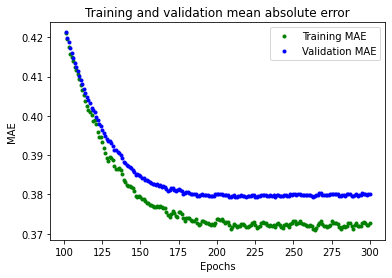

In [ ]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

We can see that training data shows consistently lower error than validation data, which means that the network may have _overfit_.

In addition, the mean absolute error values are quite high, ~0.38 at best, which means some of the model's predictions are at least 38% off. A 38% error means we are very far from accurately modelling the function.

**3. Actual vs Predicted Outputs**

Let's check its predictions against the test dataset we set aside earlier, what do you notice ?

7/7 [==============================] - 0s 3ms/step - loss: 0.2476 - mae: 0.3833


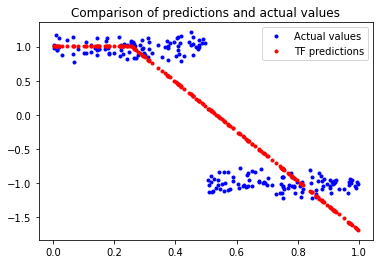

In [ ]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model_1.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model_1.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()

The graph makes it clear that our network can not approximate the square-wave function.

We can confirm that the model does not have enough capacity to learn the full complexity of the function. By making our model bigger, we may improve its performance.

## Training a Larger Model

### 1. Design a bigger model
Let's add an additional layer of neurons. The following cell redefines our model in the same way as earlier, but with 16 neurons in the first layer and an additional layer of 16 neurons in the middle:

In [ ]:
model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations
model.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model.compile(optimizer='adam', loss="mse", metrics=["mae"])

### 2. Train the Model ###

We'll now train and save the new model.

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=300, batch_size=64,
                    validation_data=(x_validate, y_validate))

# Save the model to disk
model.save(MODEL_TF)

Epoch 1/300
10/10 [==============================] - 1s 24ms/step - loss: 0.9730 - mae: 0.9789 - val_loss: 0.9374 - val_mae: 0.9609
Epoch 2/300
10/10 [==============================] - 0s 8ms/step - loss: 0.9391 - mae: 0.9608 - val_loss: 0.9122 - val_mae: 0.9467
Epoch 3/300
10/10 [==============================] - 0s 6ms/step - loss: 0.9065 - mae: 0.9428 - val_loss: 0.8812 - val_mae: 0.9289
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 0.9006 - mae: 0.9383 - val_loss: 0.8515 - val_mae: 0.9117
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: 0.8466 - mae: 0.9074 - val_loss: 0.8181 - val_mae: 0.8911
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 0.8301 - mae: 0.8970 - val_loss: 0.7831 - val_mae: 0.8708
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: 0.8030 - mae: 0.8816 - val_loss: 0.7442 - val_mae: 0.8474
Epoch 8/300
10/10 [==============================] - 0s 8ms/step - loss: 0.7571 - 

### 3. Plot Metrics
Each training epoch, the model prints out its loss and mean absolute error for training and validation. 

You can see that we've already got a huge improvement - validation loss has dropped from 0.24 to 0.03, and validation MAE has dropped from 0.33 to 0.11.

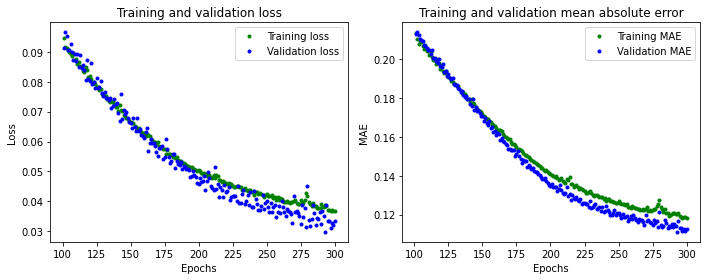

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

From these graphs, we can see several new things:

*   The overall loss and MAE are much better than our previous network
*   Metrics are better for validation than training, which means the network is not overfitting

Our network seems to be performing well. To confirm, let's check its predictions against the test dataset we set aside earlier:


7/7 [==============================] - 0s 2ms/step - loss: 0.0413 - mae: 0.1222


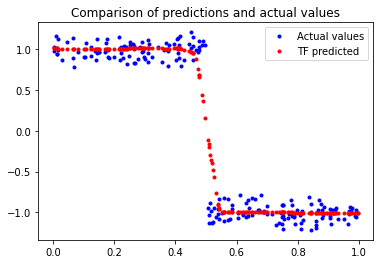

In [ ]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predicted')
plt.legend()
plt.show()

## Exercise:
Now, let's modify our data and rerun the srcipt to assess the models:

* Try a sine model such as: [*np.sin*](https://numpy.org/doc/stable/reference/generated/numpy.sin.html)
* A periodic sawtooth or triangle waveform: [
scipy.signal.sawtooth ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html)